# Fashion-MNIST Classification using PyTorch
Here I will be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), to create a Neural Network model. Fashion-MNIST is a set of 28x28 greyscale images of clothes.

<img src='https://www.franciscosalg.com/assets/post_images/2019-07-11-triplet-loss/visualizing-data.png' width=800px>


MNIST dataset because is 28x28, so it has total of 784 pixels, and there are 10 classes here. So here we want to include at least one Hidden Layer. Also I am going to use ReLU activation that is commonly use by data scientists for the layers to get log-softmax from forward pass. Lets start!!! 

##### Here, if we have the GPU avilable we can use it for computational otherwise we can CPU but training time will take longer

In [23]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn, optim # optim here allow us to get optimizers
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F # let us to use ReLU and log softmax
import helper
from sklearn.metrics import confusion_matrix


In [24]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [25]:
print(torch. __version__)

1.9.0


### 2) Image transformation and normalization, and conver them to tensor

In [26]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

### 3) let's load the dataset and create train and test datasets

In general there are two ways to upload the MNIST fashion datasets. 1) Load csv dile and 2) use torchvision.datasets. 
Here we use torchvision.datasets package.

In [27]:

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Download and load the test data
testset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

### 4) Creating dataloaders for both training and testing

In [28]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=10)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True, num_workers=10)

In [29]:
##   Different  classes in Fashion MNIST dataset

classes=('Tshirt', 'Trouser','Pullover', 'Dress', 'Coat',
        'Sandal','Shirt', 'Sneaker','Bag', 'Anke boot' )

### 3) Playing with data

In [30]:
## We can use helper function to see some images of MNIST fashion

def matplotlib_imshow (img, one_channel=False):
    if one_channel:
        img=im.mean(dim=0)
    img=img/2+0.5 # unnormalize
    npimg=img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1,2,0)))
        

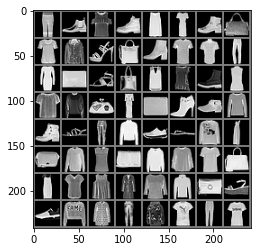

In [31]:
## Now lets try to get some random images

d=iter(trainloader)
images, labels=d.next()
matplotlib_imshow(torchvision.utils.make_grid(images))

In [32]:
##### We can also playing with the datsets these codes

In [33]:
mnist=next(iter(trainloader))
mnist[0].size()

torch.Size([64, 1, 28, 28])

In [34]:
len(trainset)

60000

In [35]:
len(testset)

10000

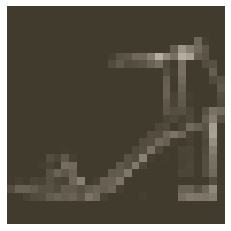

In [36]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

9


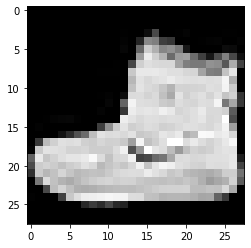

In [37]:
## or we can use this method
image, label=next(iter(trainset))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

9


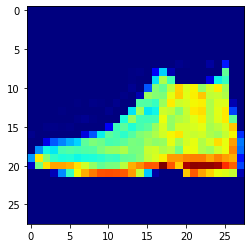

In [38]:
## or we can use this method
image, label=next(iter(testset))
plt.imshow(image.squeeze(), cmap="jet")
print(label)

### 3) Create our Neural network architecture

In [47]:

class Fashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Linear(784, 256)
        self.c2 = nn.Linear(256, 128)
        self.c3 = nn.Linear(128, 64)
        self.c4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.c1(x))
        x = F.relu(self.c2(x))
        x = F.relu(self.c3(x))
        x = F.log_softmax(self.c4(x), dim=1)
        
        return x

### 4 ) Train our neural network

#### 4.1.Create the network, define the error, learning rate and optimizer

In [48]:
model = Fashion()


error = nn.NLLLoss() #define a metric for our loss function

learning_rate=0.001 # Defining the learning rate

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
model.c1.weight

Parameter containing:
tensor([[-0.0240,  0.0044, -0.0277,  ...,  0.0265,  0.0222,  0.0002],
        [-0.0314,  0.0017, -0.0134,  ...,  0.0008,  0.0171, -0.0142],
        [-0.0338, -0.0156,  0.0341,  ...,  0.0172, -0.0304,  0.0069],
        ...,
        [-0.0070, -0.0043,  0.0253,  ...,  0.0231, -0.0335,  0.0053],
        [-0.0146, -0.0081, -0.0246,  ...,  0.0193, -0.0134,  0.0130],
        [ 0.0319, -0.0145, -0.0216,  ...,  0.0002, -0.0054, -0.0297]],
       requires_grad=True)

In [50]:
model.c4.weight

Parameter containing:
tensor([[-0.0496,  0.0485, -0.0476, -0.0971,  0.0925, -0.0936, -0.0650, -0.0042,
         -0.0133, -0.0203,  0.0654,  0.0708,  0.0474,  0.0856,  0.0761, -0.0860,
         -0.0555, -0.0008,  0.0571, -0.0120, -0.0679, -0.0671,  0.1097,  0.1150,
          0.0057,  0.0811,  0.0424,  0.0350,  0.1130, -0.1020,  0.0024,  0.1073,
          0.0405,  0.0683, -0.1173,  0.0346, -0.0955, -0.0669, -0.0202,  0.1004,
         -0.0207, -0.0450,  0.0060,  0.0589, -0.0898, -0.0882,  0.1046, -0.1069,
         -0.0888, -0.1012, -0.0782,  0.0805,  0.0192, -0.1082, -0.0446,  0.0944,
          0.0294,  0.0649, -0.0727,  0.0279,  0.0637,  0.0701, -0.1229,  0.0378],
        [ 0.0103,  0.0669,  0.0329,  0.0133,  0.0786,  0.0753, -0.0999, -0.0580,
         -0.0162, -0.0990,  0.1105, -0.0036, -0.0726,  0.0588, -0.0938, -0.0749,
         -0.0648,  0.0676, -0.0542, -0.0887, -0.0988, -0.0917,  0.0358, -0.1151,
          0.0860, -0.0812,  0.0935,  0.0218,  0.0234,  0.0397, -0.0533, -0.1204,
     

### 4.2. Train and test our  Neural Network

In [67]:

num_epochs = 50

for e in range(num_epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = error(log_ps, labels)
        
        optimizer.zero_grad() # Zeroing our gradients
        loss.backward() # Taking  backward pass
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}", end=" ")
        
    model.eval()
    with torch.no_grad():
        total=0
        correct=0
        for images,labels in testloader:
            log_ps=model(images)
            mx_index=torch.argmax(log_ps,dim=1)
            total+=labels.numel()
            correct+=sum(mx_index==labels).item()
        print(f"Test Accuracy {correct/total*100:.2f}")

Training loss: 0.14754585942912743 Test Accuracy 88.92
Training loss: 0.14208320665782861 Test Accuracy 88.74
Training loss: 0.1352428904424773 Test Accuracy 89.27
Training loss: 0.13074496214879727 Test Accuracy 88.68
Training loss: 0.12523439634583397 Test Accuracy 88.58
Training loss: 0.12310625695939194 Test Accuracy 88.59
Training loss: 0.11880845897225366 Test Accuracy 88.89
Training loss: 0.11665684478516296 Test Accuracy 88.85
Training loss: 0.10763699232217377 Test Accuracy 88.54
Training loss: 0.10737171677399927 Test Accuracy 88.43
Training loss: 0.10105528243616826 Test Accuracy 88.26
Training loss: 0.10165804546914184 Test Accuracy 88.66
Training loss: 0.0992734274441706 Test Accuracy 88.64
Training loss: 0.09211904059763926 Test Accuracy 88.88
Training loss: 0.09224691833066605 Test Accuracy 89.12
Training loss: 0.08762567619910278 Test Accuracy 88.03
Training loss: 0.09005894728088334 Test Accuracy 89.18
Training loss: 0.0849000990638005 Test Accuracy 88.56
Training loss

### 5. Test our network

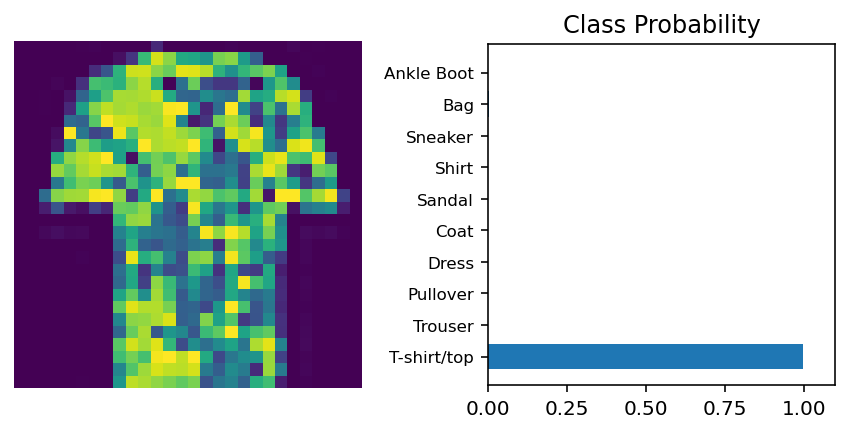

In [68]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

#  Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')